# CH.3 - Built-in Data Structures, Functions, and Files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm

## Data Structures and Sequences

<br><br>
### Tuple
A tuple is a fixed-length, immutable sequence of Python objects. 

The easiest way to create one is with a comma-separated sequence of values.

You can convert any sequence or iterator to a tuple by invoking `tuple()`

Elements can be accessed with square brackets `[]` as with most other sequence types.

If an object inside a tuple is mutable, such as a list, you can modify it in-place:

In [2]:
tup = ('foo',[1,2,3], True)

tup[1].append(4)

tup

('foo', [1, 2, 3, 4], True)

You can concatenate tuples using the + operator to produce longer tuples:

In [3]:
(4, None, 'foo') + (1,2,3) + (True, False, True)

(4, None, 'foo', 1, 2, 3, True, False, True)

In [5]:
('foo','bar') * 3

('foo', 'bar', 'foo', 'bar', 'foo', 'bar')

In [8]:
# Nested tuple
tup = 1, 2, (3, 4, 5)

a, b, (c, d, e) = tup

print(a,b,c,d,e)

# swap variable names
a, b = b, a

print('a: ', a, ' b: ', b)

1 2 3 4 5
a:  2  b:  1


In [10]:
# unpacking over a sequence of tuples
for a, b, c in [(1, 2, 3), (4, 5, 6), (7, 8, 9)]:
    print(f'a:{a}, b:{b}, c:{c}')

a:1, b:2, c:3
a:4, b:5, c:6
a:7, b:8, c:9


In [13]:
# using * for the rest of the tuple
tup = (range(1,7))

a, b, c, *_ = tup

print(a,b,c)
print(_)

1 2 3
[4, 5, 6]


<br><br>
### Lists

In contrast with tuples, lists are variable-length and their contents can be modified
in-place.

Lists and tuples are semantically similar (though tuples cannot be modified) and can
be used interchangeably in many functions.

In [21]:
alist = [1, 2, 3]

# append
alist.append(4)

# insert at position
alist.insert(1, 'a')

print('append and insert :', alist)

# pop at index
alist.pop(4)

# remove at value
alist.remove('a')

print('pop and remove: ', alist)

# bool statement
condition = 'a' not in alist

print('check if it\'s in the list: ', condition)

# extend by multiple elements
alist.extend(['a','b','c'])

print('extend multiple elements: ', alist)


append and insert : [1, 'a', 2, 3, 4]
pop and remove:  [1, 2, 3]
check if it's in the list:  True
extend multiple elements:  [1, 2, 3, 'a', 'b', 'c']
sorting:  [1, 3, 5, 6, 8, 9, 36, 37, 45, 56]


* Note that list concatenation by addition is a comparatively expensive operation since
a new list must be created and the objects copied over. **Using extend to append elements to an existing list**, especially if you are building up a large list, is usually preferable.

`sort` has a few options that will occasionally come in handy. One is the ability to pass
a secondary sort key—that is, a function that produces a value to use to sort the
objects.

In [23]:
# sorting
blist = [1,56,5,36,8,3,6,37,9,45]
blist.sort()

print('sorting: ', blist)

blist = ['a','fds','python', 'data', 'analysis', 'cookbooks','ab']
blist.sort(key=len)

print('sorting by length: ', blist)

sorting:  [1, 3, 5, 6, 8, 9, 36, 37, 45, 56]
sorting by length:  ['a', 'ab', 'fds', 'data', 'python', 'analysis', 'cookbooks']


##### bisect
The built-in bisect module implements **binary search and insertion into a sorted list**.

`bisect.bisect` finds the location where an element should be inserted to keep it sorted, 

while `bisect.insort` actually inserts the element into that location

In [33]:
import bisect

c = [90, 30, 20, 40, 60, 70, 50, 80, 10]
c.sort()

print('position: ',bisect.bisect(c, 55))

bisect.insort(c,55)

print(c)

position:  5
[10, 20, 30, 40, 50, 55, 60, 70, 80, 90]


#### Slicing

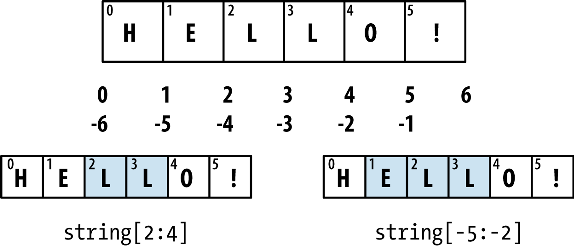

In [50]:
seq = list(range(1,31))

print('neg slicing to end: ',seq[-4:])
print('neg slicing: ',seq[-6:-3])
print('slicing every other element: ',seq[::4])
print('neg slicing ev ot elem (reverse): ',seq[::-2])

neg slicing to end:  [27, 28, 29, 30]
neg slicing:  [25, 26, 27]
slicing every other element:  [1, 5, 9, 13, 17, 21, 25, 29]
neg slicing ev ot elem (reverse):  [30, 28, 26, 24, 22, 20, 18, 16, 14, 12, 10, 8, 6, 4, 2]


### Built-in Sequence Functions

In [66]:
# enumerate
mapping = {}
for i, v in enumerate(range(1,21)):
    mapping[v] = i

print('enumerate: ', mapping)

# sorted
print('sorted: ',sorted('data analysis'))

# zip
seq1 = ['foo','bar','baz','ham','spam']
seq2 = ['hi','hello']
print('zip: ',list(zip(seq2,seq1)))

# reversed
print('reversed: ',list(reversed(range(10))))

enumerate:  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19}
sorted:  [' ', 'a', 'a', 'a', 'a', 'd', 'i', 'l', 'n', 's', 's', 't', 'y']
zip:  [('hi', 'foo'), ('hello', 'bar')]
reversed:  [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


* zip can take an arbitrary number of sequences, and the number of elements it produces is **determined by the shortest sequence**

Given a “zipped” sequence, zip can be applied in a clever way to **“unzip” the
sequence**.

In [64]:
langs = [('java','python'),('scala','R')]

compiled, interpreted = zip(*langs)

compiled, interpreted

(('java', 'scala'), ('python', 'R'))

<br><br>
### dict

A more common name for it is *hash map* or *associative array*. It is a **flexibly sized collection of key-value pairs**, where key and value are Python objects.

In [85]:
d1 = {'a': 1, 'b': 23, 'c': 34}

# insert
d1['d'] = 45

print('insert: ',d1)
print('get b: ', d1['b'])
print('checking c: ', 'c' in d1)

# deleting
del d1['d']
print('deleting d :', d1)

# pop
d1.pop('c')
print('popping c: ', d1)

# keys
print('keys: ', d1.keys())

# values
print('values: ', d1.values())

# update
d1.update({'c': 'python', 'd': 'an integer'})
print('update: ', d1)

insert:  {'a': 1, 'b': 23, 'c': 34, 'd': 45}
get b:  23
checking c:  True
deleting d : {'a': 1, 'b': 23, 'c': 34}
popping c:  {'a': 1, 'b': 23}
keys:  dict_keys(['a', 'b'])
values:  dict_values([1, 23])
update:  {'a': 1, 'b': 23, 'c': 'python', 'd': 'an integer'}


#### Creating dicts from sequences

Since a dict is essentially a collection of 2-tuples, the `dict` function accepts a list of
2-tuples:

In [1]:
mapping = dict(zip(range(5), reversed(range(5))))

mapping

{0: 4, 1: 3, 2: 2, 3: 1, 4: 0}

#### Default values

In [6]:
words = ['apple','banana','grapes','olives','airplane', 'bow','car','ground','gasket']

by_letter = {}

for word in words:
    letter = word[0]
    by_letter.setdefault(letter, []).append(word)

print('setdefault:\n',by_letter)

from collections import defaultdict
by_letter = defaultdict(list)

for word in words:
    by_letter[word[0]].append(word)
    
print('defaultdict:\n',by_letter)

setdefault:
 {'a': ['apple', 'airplane'], 'b': ['banana', 'bow'], 'g': ['grapes', 'ground', 'gasket'], 'o': ['olives'], 'c': ['car']}
defaultdict:
 defaultdict(<class 'list'>, {'a': ['apple', 'airplane'], 'b': ['banana', 'bow'], 'g': ['grapes', 'ground', 'gasket'], 'o': ['olives'], 'c': ['car']})


#### Valid dict key types

You can check whether an object is hashable (can be used as a key in a dict) with the `hash` function:

In [95]:
print('strings:',hash('a'))
print('tuples:', hash((1, 2, (2, 3))))
print('ints and floats:', hash(3), hash(4.5))

# lists fail because are mutable
# To use a list as a key, one option is to convert it to a tuple, which can be hashed as
# long as its elements also can

strings: 3104575548305882980
tuples: 1097636502276347782
ints and floats: 3 1152921504606846980


<br><br>
### set

A `set` is an unordered collection of unique elements. You can think of them like dicts,
but keys only, no values. Like dicts, set elements generally must be immutable. To have list-like elements, you must convert it to a tuple.

In [19]:
print('from constructor:',set([2,3,45,76,4,3]))
print('from literal:',{2,3,45,76,4,3})

from constructor: {2, 3, 4, 76, 45}
from literal: {2, 3, 4, 76, 45}


#### set operations

In [96]:
a = {3,2,45,24,2,5}
b = {3,4,12,24,6,5}

# union
print('union:',a.union(b)) # a | b

# intersection
print('intersection:', a.intersection(b)) # a & b

# difference
print('difference:', a.difference(b)) # a - b

# symmetric difference
print('symmetric difference:', a.symmetric_difference(b)) # or a ^ b

union: {2, 3, 4, 5, 6, 12, 45, 24}
intersection: {24, 3, 5}
difference: {2, 45}
symmetric difference: {2, 4, 6, 12, 45}


<br><br>

### List, Set, and Dict Comprehensions

`list_comp = [*expr* for *value* in collection if *condition*]`

In [24]:
strings = ['a', 'as', 'bat', 'car', 'dove', 'python']

[x.upper() for x in strings if len(x) > 2]

['BAT', 'CAR', 'DOVE', 'PYTHON']

`dict_comp = {*key-expr*: *value-expr* for value in collection if *condition*}`

In [25]:
{val: index for index, val in enumerate(strings)}

{'a': 0, 'as': 1, 'bat': 2, 'car': 3, 'dove': 4, 'python': 5}

`set_comp = {*expr* for *value* in collection if *condition*}`

In [26]:
unique_lengths = {len(x) for x in strings}

unique_lengths

{1, 2, 3, 4, 6}

#### Nested list comprehensions

In [28]:
all_data = [['John', 'Emily', 'Michael', 'Mary', 'Steven'],
            ['Maria', 'Juan', 'Javier', 'Natalia', 'Pilar']]

# names with two or more 'e's
result = [name for names in all_data for name in names if name.count('e') >= 2]
print(result)

some_tuples = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]

unrolled = [tup for atuple in some_tuples for tup in atuple]
print(unrolled)

['Steven']
[1, 2, 3, 4, 5, 6, 7, 8, 9]


<br><br>

## Functions

The main restriction on function arguments is that the **keyword arguments must follow the positional arguments** (if any).

In [32]:
import re

states = ['Alabama ', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda',
          'south  carolina##', 'West virginia?']

def remove_punctuation(value):
    return re.sub('[!#?]', '', value)

clean_ops = [str.strip, remove_punctuation, str.title]

# Using functions as arguments to other functions
def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result

clean_strings(states, clean_ops)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South  Carolina',
 'West Virginia']

In [3]:
# Using functions as arguments to other functions
def apply_to_list(some_list, f):
    return [f(x) for x in some_list]

ints = [3, 4, 6, 2, 1]
apply_to_list(ints, lambda x: x ** 2)

[9, 16, 36, 4, 1]

### Currying

Means deriving new functions from existing ones by **partial argument application**.

In [4]:
def add_numbers(x,y):
    return x + y

add_five = lambda y: add_numbers(5,y)

add_five(1)

6

### Generators

#### Iterators

In [6]:
some_dict = {'a': 1,'b': 1,'c': 1}

for key in some_dict:
    print(key)

# When you write for key in some_dict , the Python interpreter first attempts to 
# create an iterator out of some_dict :
dict_iterator = iter(some_dict)

print(dict_iterator)

a
b
c


An iterator is any object that will yield objects to the Python interpreter when used in
a context like a for loop.This includes built-in methods such as min , max , and sum ,
and type constructors like list and tuple.

A **generator** is a concise way to construct a new iterable object. Whereas normal func‐
tions execute and return a single result at a time, **generators return a sequence of
multiple results lazily**, pausing after each one until the next one is requested. To create
a generator, use the yield keyword instead of return in a function:

In [7]:
def squares(n = 10):
    print('Generating squares from 1 to {0}'.format(n ** 2))
    for i in range(1, n + 1):
        yield i ** 2

When you actually call the generator, no code is immediately executed:

In [8]:
gen = squares()

gen

<generator object squares at 0x7f5ce9c63450>

It is not until you request elements from the generator that it begins executing its
code:

In [9]:
for x in gen:
    print(x, end=' ')

Generating squares from 1 to 100
1 4 9 16 25 36 49 64 81 100 

### Generator Expressions

Another even more concise way to make a generator is by using a **generator expression**. This is a generator analogue to list, dict, and set comprehensions; to create one, enclose what would otherwise be a list comprehension within parentheses instead of brackets:

In [10]:
gen = (x ** 2 for x in range(100))

gen

<generator object <genexpr> at 0x7f5d00aa13d0>

Generator expressions can be used instead of list comprehensions as function argu‐
ments in many cases:

In [12]:
print(sum(x ** 2 for x in range(100)))
print(dict((i, i ** 2) for i in range(5)))

328350
{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}


### itertools module

The standard library itertools module has a collection of generators for many common data algorithms. For example, groupby takes any sequence and a function,
grouping consecutive elements in the sequence by return value of the function.

In [14]:
import itertools

first_letter = lambda x: x[0]

names = ['Alan', 'Adam', 'Wes', 'Will', 'Albert', 'Steven'] 

for letter, names in itertools.groupby(names, first_letter):
    print(letter, list(names))

A ['Alan', 'Adam']
W ['Wes', 'Will']
A ['Albert']
S ['Steven']


<br><br>

## Errors and Exception Handling

In [15]:
print(float('1.2343'))

print(float('something'))

1.2343


ValueError: could not convert string to float: 'something'

In [17]:
def attempt_float(x):
    try:
        return float(x)
    except:
        return x

attempt_float('something')

'something'

You might want to only suppress **ValueError**, since a **TypeError** (the input was not a
string or numeric value) might indicate a legitimate bug in your program. To do that,
write the exception type after except:

In [23]:
%xmode Verbose 

def attempt_float(x):
    try:
        return float(x)
    except ValueError:
        return x

attempt_float((1,2))

Exception reporting mode: Verbose


TypeError: float() argument must be a string or a number, not 'tuple'

In [19]:
def attempt_float(x):
    try:
        return float(x)
    except (ValueError, TypeError):
        return x
    
attempt_float('something')

'something'

In some cases, you may not want to suppress an exception, but you want some code
to be executed regardless of whether the code in the try block succeeds or not. To do
this, use **finally** :

```python
f = open(path, 'w')

try:
    write_to_file(f)
except:
    print('Write failed.')
else:
    print('Succeeded')
finally:
    f.close()
``` 

<br><br>

## Files and the Operating System

* By default, the file is opened in read-only mode 'r' .

In [32]:
path = 'examples/segismundo.txt'

f = open(path)

lines = []

for line in f:
    lines.append(line)

print (lines)

f.close()

['Sueña el rico en su riqueza,\n', 'que más cuidados le ofrece;\n', '\n', 'sueña el pobre que padece\n', 'su miseria y su pobreza;\n', '\n', 'sueña el que a medrar empieza,\n', 'sueña el que afana y pretende,\n', 'sueña el que agravia y ofende,\n', '\n', 'y en el mundo, en conclusión,\n', 'todos sueñan lo que son,\n', 'aunque ninguno lo entiende.\n', '\n']


In [33]:
lines = [x.rstrip() for x in open(path)]

lines

['Sueña el rico en su riqueza,',
 'que más cuidados le ofrece;',
 '',
 'sueña el pobre que padece',
 'su miseria y su pobreza;',
 '',
 'sueña el que a medrar empieza,',
 'sueña el que afana y pretende,',
 'sueña el que agravia y ofende,',
 '',
 'y en el mundo, en conclusión,',
 'todos sueñan lo que son,',
 'aunque ninguno lo entiende.',
 '']

In [49]:
with open(path) as f:
    lines = [x.rstrip('\n,;') for x in f]
    
lines

['Sueña el rico en su riqueza',
 'que más cuidados le ofrece',
 '',
 'sueña el pobre que padece',
 'su miseria y su pobreza',
 '',
 'sueña el que a medrar empieza',
 'sueña el que afana y pretende',
 'sueña el que agravia y ofende',
 '',
 'y en el mundo, en conclusión',
 'todos sueñan lo que son',
 'aunque ninguno lo entiende.',
 '']

In [97]:
f = open(path)

# read
print('read: ', f.read(10))

# tell position
print('tell: ',f.tell())

# seek changes the file position
print('seek: ', f.seek(10), f.read(10))

# Binary mode
f2 = open(path, 'rb')
print('binary mode: ',f2.read(10))

f.close()
f2.close()

read:  Sueña el r
tell:  11
seek:  10 rico en su
binary mode:  b'Sue\xc3\xb1a el '


In [67]:
with open(path) as f:
    print(f.readlines(10))

['Sueña el rico en su riqueza,\n']


<br><br>

# Aula python

## Classes

* Todas as classes descendem da classe object em algum nível
* Independente do nome da classe, o nome do construtor sempre será __init__

In [69]:
class Carro(object):
    def __init__(self, fabricante, modelo):
        self.fabricante = fabricante
        self.modelo = modelo

carro1 = Carro('toyota','corolla') # instância

print(carro1.fabricante, carro1.modelo)

toyota corolla


## Getters e setters
* Métodos getter são decorados com @property
    * são acessados como se fossem atributos
* Métodos setter são decorados com @.setter
    * são atribuídos como se fossem atributos

In [74]:
class MyClass(object):
    def __init__(self, var):
        self._var = var
        
    @property
    def var(self):
        return self._var
    
    @var.setter
    def var(self, value):
        if value > 0:
            self._var = value
        else:
            print('Valor inválido.')
    
    @var.deleter
    def var(self):
        print('Deletando var!')
        del self._var

In [71]:
instance = MyClass(1)
print(instance.var)

1


In [72]:
instance.var =  5
print(instance.var)

5


In [75]:
instance = MyClass(5)
del instance.var

Deletando var!


## Métodos e atributos privados

* Um método é dito **final** quando não pode ser sobrescrito por nenhuma classe descendente
* O underline _ (**um para atributos, dois para métodos**) notifica outros programadores que aquele método/atributo **não deve ser acessado por eles**, e que se o fizerem, resultará em um comportamento inesperado

In [86]:
class Aviao(object):
    def __init__(self, motor):
        self._motor = motor # atributo que não deve ser acessado fora do escopo de Aviao
    
    def voa(self):
        self.__queima_combustivel__()
    
    def __queima_combustivel__(self): # metodo que não deve ser acessado fora do escopo de Aviao
        print('queimando combustível com o motor {}'.format(self._motor))
    
    @property # metodologia correta para acessar um atributo privado
    def motor(self):
        return self._motor

atr_72 = Aviao('truboprop')
atr_72.voa()
print(atr_72.motor)

# note que uma propriedade é tratada como um atributo na chamada,
# mas implementada como uma função na classe

queimando combustível com o motor truboprop
truboprop


### Métodos Estáticos

* Métodos estáticos não interagem com nenhum atributo da instância

In [90]:
class MyClass(object):
    @staticmethod
    def my_static_method():
        return 'hello world!'
    
classe1 = MyClass()

print('Método da classe:\t', MyClass.my_static_method())
print('Método da instância:\t', classe1.my_static_method())

Método da classe:	 hello world!
Método da instância:	 hello world!


### Métodos de classe

* Métodos de classe são voltados a instanciar objetos a partir de outros métodos que não os construtores
* Em Python, não existe sobrecarga de métodos a nível da mesma classe (apenas classes descendentes podem sobrescrever métodos das classes pai)
    * também pode ser chamado de polimorfismo
* Portanto, métodos de classe são importantes para tratar diversos tipos de dados

In [98]:
class Date(object):
    day = 1
    month = 1
    year = 1970
    def __init__(self, day, month,year):
        self.day, self.month, self.year = (day, month, year)
        
    @classmethod
    def from_string(cls, string): # o primeiro parâmetro de classe é a própria classe
        some_list = string.split('-')
        date = cls(some_list[0], some_list[1], some_list[2])
        return date

In [101]:
date1 = Date(2, 3, 1973)
date2 = Date.from_string('2-3-1973')
print('usando constructor:\t\t', date1.year)
print('usando método de classe:\t', date2.year)

usando constructor:		 1973
usando método de classe:	 1973


* Para que atributos de uma classe possuam valores default, declare-os no corpo da classe:

In [102]:
class Bairro(object):
    nome = 'sem nome'
    def __init__(self, nome):
        self.nome = nome # sobreescreve o atributo nome desta instância, mas não da classe
    
bairro1 = Bairro('partenon')
print(bairro1.nome)
print(Bairro.nome)

Bairro.nome = 'ainda sem nome' # sobrescreve o valor do atributo "nome" da classe; válido apenas durante a execução do código
print(Bairro.nome)

partenon
sem nome
ainda sem nome


## Herança Múltipla

In [103]:
class Fulano(object):
    def fala(self):
        print('Sou fulano!')
        
class Ciclano(Fulano):
    def fala(self):
        print('Sou ciclano!')
        
class Sicrano(Fulano):
    def fala(self):
        print('Sou sicrano!')
        
class Beltrano(Ciclano, Sicrano): # herança múltipla
    pass

## Sobrecarga de Operadores

* \+ \- \/ \*
* < > >= <= == !=

In [105]:
class Vector(object):
    coords = None
    def __init__(self, coords):
        self.coords = coords
    def __add__(self, other): # operador soma
        return [x[0] + x[1] for x in zip(self.coords, other.coords)]
    def __str__(self): # operador print
        return '[' + ', '.join([str(x) for x in self.coords]) + ']'

In [106]:
a, b = Vector([2, 3, 5]), Vector([4, 5, 6])

c = a + b

print(a)
print(b)
print(c)

[2, 3, 5]
[4, 5, 6]
[6, 8, 11]


## Exercise - Book Club

In [173]:
class Book(object):
    title = ''
    pages = 0
    def __init__(self, title, pages):
        self.title = title
        self.pages = pages
        
    def __str__(self):
        return self.title + ', ' + str(self.pages) + ' pages'
    
    def __add__(self, other):
        return self.pages + other.pages
    def __radd__(self, other):
        return self.pages + other
    def __lt__(self, other):
        if isinstance(other, int):
            return self.pages < other
        else:
            return self.pages < other.pages
    def __le__(self, other):
        if isinstance(other, int):
            return self.pages <= other
        else:
            return self.pages <= other.pages
    def __eq__(self, other):
        if isinstance(other, int):
            return self.pages == other
        else:
            return self.pages == other.pages
    def __ne__(self, other):
        if isinstance(other, int):
            return self.pages != other
        else:
            return self.pages != other.pages
    def __gt__(self, other):
        if isinstance(other, int):
            return self.pages >= other
        else:
            return self.pages >= other.pages
    def __ge__(self, other):
        if isinstance(other, int):
            return self.pages >= other
        else:
            return self.pages >= other.pages

In [174]:
book1 = Book('The Great Tales of the Sea', 345)
book2 = Book('The Amazing Expedition', 520)

# str method
print(book1)
print(book2)

# reverse sum and sum
print(sum([book1, book2]))
print(book1 + book2)

# less then
print(book1 < book2)
print(book1 < 100)

# less equal
print(book1 <= book2)
print(book1 <= 100)

# equal
print(book1 == book2)
print(book1 == 100)

# not equal
print(book1 != book2)
print(book1 != 100)

# greater than
print(book1 > book2)
print(book1 > 100)

# greater or equal
print(book1 >= book2)
print(book1 >= 100)

The Great Tales of the Sea, 345 pages
The Amazing Expedition, 520 pages
865
865
True
False
True
False
False
False
True
True
False
True
False
True
